<a href="https://colab.research.google.com/github/Faradezo/trilha_1/blob/main/Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


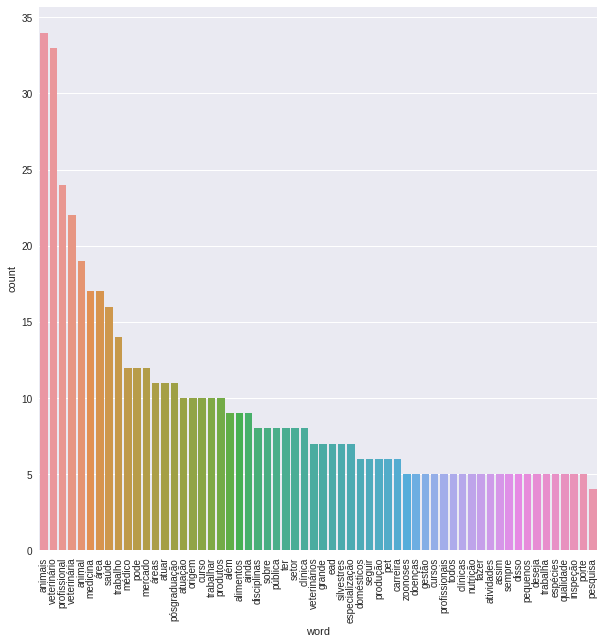

In [2]:
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import string

texto = []

for line in urllib.request.urlopen('https://raw.githubusercontent.com/Faradezo/trilha_1/main/.github/workflows/documentoTeste.txt'): 
    texto.append(line.decode('utf-8'))

nltk.download('stopwords')                              # baixa arquivo com as stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')   #seleciona a tabela de palavras em portugues

for i in range(len(texto)):
    for chars in string.punctuation:
	    texto[i] = texto[i].replace(chars,'') # !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
	    texto[i] = texto[i].replace('—','')   # este simbolo nao esta incluso no strings porem existe no documento

mydict = {}                             # cria um dicionário vazio

for line in texto:
    line = line.lower()                    # converte para lower
    words = line.split()                   # separa cada palavra
    for word in words:                     # para cada palavra em words
        if word not in stopwords:          # exclui palavras genericas
            if word not in mydict.keys():  # se palavra não está no dicionário
                mydict[word] = 1           # acrescenta a word com o valor 1
            else:                          # se a entrada já existe
                mydict[word] += 1          # soma 1 ao valor já existente

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df.iloc[:60] # somente os 60 maiores termos
plt.figure(figsize=(10,10)) 
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()